### Seeds dataset classification

In [55]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import KFold
import matplotlib.pyplot as plt

In [56]:
data = np.genfromtxt("seeds_dataset.txt")
classifier = KNeighborsClassifier(n_neighbors=1)
features = data[:,:7]
labels = data[:,-1]

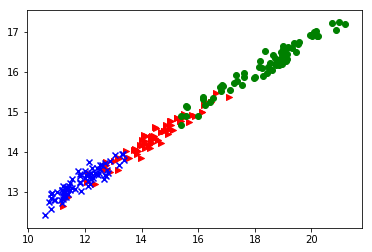

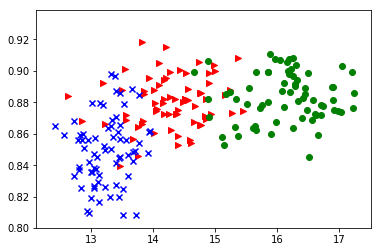

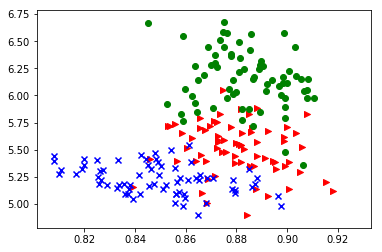

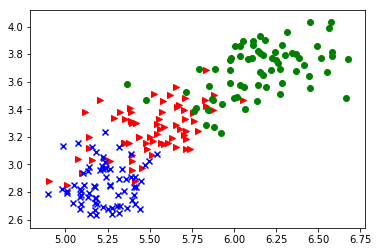

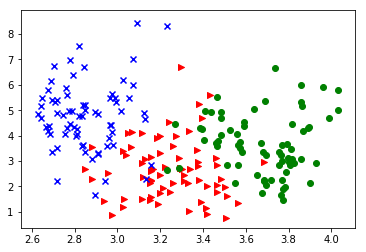

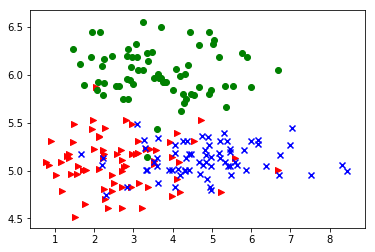

In [57]:
# to visualize the data in the dataset
for i in range(6):
    for t in range(1,4):
        if t == 1:
            c = 'r'
            marker = '>'
        elif t == 2:
            c = 'g'
            marker = 'o'
        elif t == 3:
            c = 'b'
            marker = 'x'
        plt.scatter(features[labels == t,(i)],features[labels == t,(i+1)],
            marker=marker,c=c)  
    plt.show()

In [58]:
kf = KFold(len(features), n_folds=5, shuffle=True)
# `means` will be a list of mean accuracies (one entry per fold)
means = []
for training,testing in kf:
    # We fit a model for this fold, then apply it to the
    # testing data with `predict`:
    classifier.fit(features[training], labels[training])
    prediction = classifier.predict(features[testing])

    # np.mean on an array of booleans returns fraction
    # of correct decisions for this fold:
    curmean = np.mean(prediction == labels[testing])
    means.append(curmean)
print("Mean accuracy: {:.1%}".format(np.mean(means)))

Mean accuracy: 89.5%


In [64]:
## With normalization will have a better result

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
classifier_norm = KNeighborsClassifier(n_neighbors=1)
classifier_norm = Pipeline([('norm', StandardScaler()),
                       ('knn', classifier)])
kf_norm = KFold(len(features), n_folds=5, shuffle=True)
means_norm = []
for training,testing in kf_norm:
    # We fit a model for this fold, then apply it to the
    # testing data with `predict`:
    classifier_norm.fit(features[training], labels[training])
    prediction = classifier_norm.predict(features[testing])

    # np.mean on an array of booleans returns fraction
    # of correct decisions for this fold:
    curmean = np.mean(prediction == labels[testing])
    means_norm.append(curmean)
print("Mean accuracy: {:.1%}".format(np.mean(means_norm)))

Mean accuracy: 94.8%
